In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
d =np.load('cv_scores_gpr.npz')
cv_scores_gpr = d['cv_scores_gpr']

d =np.load('cv_scores_mgpr.npz')
cv_scores_mgpr = d['cv_scores_mgpr']

d =np.load('cv_scores_rf.npz')
cv_scores_rf = d['cv_scores_rf']

d =np.load('cv_scores_svm.npz')
cv_scores_svm = d['cv_scores_svm']

d =np.load('cv_scores_mlp.npz')
cv_scores_mlp = d['cv_scores_mlp']

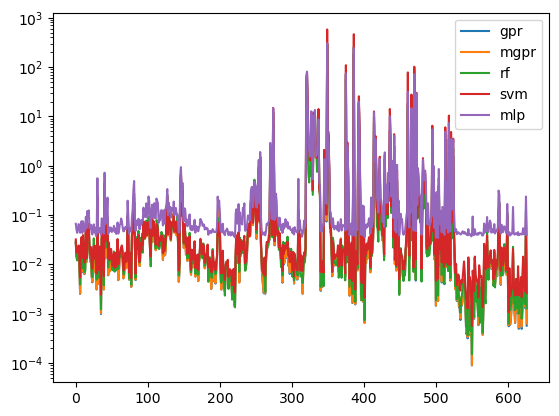

In [4]:
plt.plot(-cv_scores_gpr, label='gpr')
plt.plot(-cv_scores_mgpr, label='mgpr')
plt.plot(-cv_scores_rf, label='rf')
plt.plot(-cv_scores_svm, label='svm')
plt.plot(-cv_scores_mlp, label='mlp')
plt.yscale('log')
plt.legend()
plt.show()

In [5]:
print(np.nanmedian(cv_scores_gpr))
print(np.nanmedian(cv_scores_mgpr))
print(np.nanmedian(cv_scores_rf))
print(np.nanmedian(cv_scores_svm))
print(np.nanmedian(cv_scores_mlp))

-0.01624242559483701
-0.016318170745503062
-0.019089845597731185
-0.021040536152097413
-0.06473865952796412
